In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_summary(snap_name, boxsize=75000.0):
    dtype=[('fofid','i8'),
           ('mfof', 'f8'),
           ('x', 'f8'),
           ('y', 'f8'), 
           ('z', 'f8'),
           ('vx', 'f8'),
           ('vy', 'f8'),
           ('vz', 'f8')]
    snap_data = np.loadtxt(snap_name, dtype=dtype)    
    return snap_data

In [3]:
data_dm_A = load_summary('../data/dm_selected/summary_halo_A.txt')
data_dm_B = load_summary('../data/dm_selected/summary_halo_B.txt')
data_mstar_A = load_summary('../data/mstar_selected/summary_halo_A.txt')
data_mstar_B = load_summary('../data/mstar_selected/summary_halo_B.txt')

In [4]:
def separation(data_A, data_B):
    d = 0.0
    for c in ['x', 'y', 'z']:
        d += (data_A[c] - data_B[c])**2
    d = np.sqrt(d)
    return d

In [5]:
def vel_diff(data_A, data_B):
    d = 0.0
    for c in ['vx', 'vy', 'vz']:
        d += (data_A[c] - data_B[c])**2
    d = np.sqrt(d)
    return d

In [6]:
def vel_radial(data_A, data_B):
    d = 0.0
    d += (data_A['vx'] - data_B['vx'])*(data_A['x'] - data_B['x'])
    d += (data_A['vy'] - data_B['vy'])*(data_A['y'] - data_B['y'])
    d += (data_A['vz'] - data_B['vz'])*(data_A['z'] - data_B['z'])
    dd = separation(data_A, data_B) 
    d = d/dd
    return d

In [7]:
def total_mass(data_A, data_B):
    t = data_A['mfof'] + data_B['mfof']
    same = (data_A['fofid']==data_B['fofid'])
    t[same] = data_A['fofid'][same]
    return t

In [8]:
d_dm = separation(data_dm_A, data_dm_B)
d_mstar = separation(data_mstar_A, data_mstar_B)
v_dm = vel_diff(data_dm_A, data_dm_B)
v_mstar = vel_diff(data_mstar_A, data_mstar_B)
v_radial_dm = vel_radial(data_dm_A, data_dm_B)
v_radial_mstar = vel_radial(data_mstar_A, data_mstar_B)
t_dm = total_mass(data_dm_A, data_dm_B)
t_mstar = total_mass(data_mstar_A, data_mstar_B)

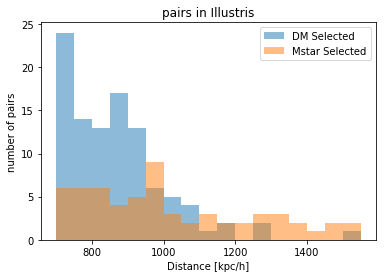

In [9]:
a = plt.hist(d_dm, bins=range(700,1600,50), label='DM Selected', alpha=0.5)
a = plt.hist(d_mstar, bins=range(700,1600,50), label='Mstar Selected', alpha=0.5)
plt.xlabel('Distance [kpc/h]')
plt.ylabel('number of pairs')
plt.title('pairs in Illustris')
plt.legend()

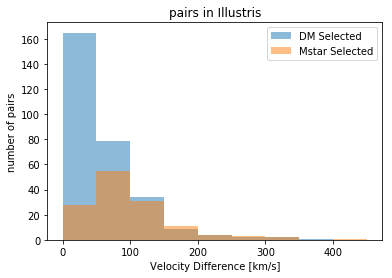

In [10]:
a = plt.hist(v_dm, bins=range(0,500,50), label='DM Selected', alpha=0.5)
a = plt.hist(v_mstar, bins=range(0,500,50), label='Mstar Selected', alpha=0.5)
plt.xlabel('Velocity Difference [km/s]')
plt.ylabel('number of pairs')
plt.title('pairs in Illustris')
plt.legend()

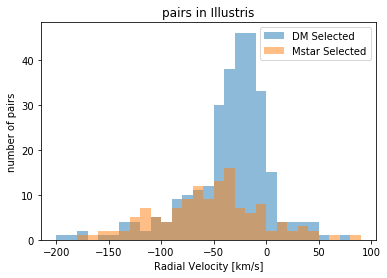

In [11]:
a = plt.hist(v_radial_dm, bins=range(-200,100,10), label='DM Selected', alpha=0.5)
a = plt.hist(v_radial_mstar, bins=range(-200,100,10), label='Mstar Selected', alpha=0.5)
plt.xlabel('Radial Velocity [km/s]')
plt.ylabel('number of pairs')
plt.title('pairs in Illustris')
plt.legend()

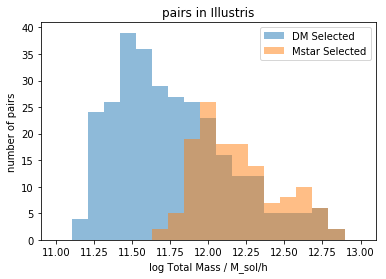

In [12]:
a = plt.hist(np.log10(t_dm*1E10), bins=np.linspace(11,13,20), label='DM Selected', alpha=0.5)
a = plt.hist(np.log10(t_mstar*1E10), bins=np.linspace(11,13,20), label='Mstar Selected', alpha=0.5)
plt.xlabel('log Total Mass / M_sol/h')
plt.ylabel('number of pairs')
plt.title('pairs in Illustris')
plt.legend()

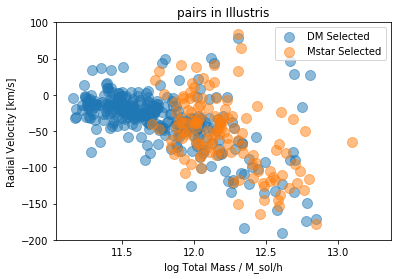

In [13]:
plt.scatter(np.log10(t_dm*1E10), v_radial_dm, label='DM Selected', s=100, alpha=0.5)
plt.scatter(np.log10(t_mstar*1E10), v_radial_mstar, label='Mstar Selected', s=100, alpha=0.5)
plt.ylim([-200,100])
plt.xlabel('log Total Mass / M_sol/h')
plt.ylabel('Radial Velocity [km/s]')
plt.title('pairs in Illustris')
plt.legend()

26 29


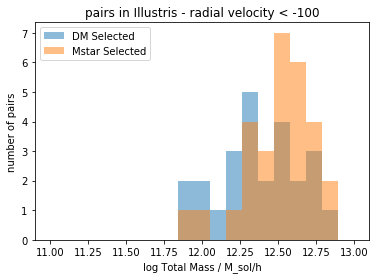

In [14]:
a = plt.hist(np.log10(t_dm[v_radial_dm<-100]*1E10), bins=np.linspace(11,13,20), label='DM Selected', alpha=0.5)
a = plt.hist(np.log10(t_mstar[v_radial_mstar<-100]*1E10), bins=np.linspace(11,13,20), label='Mstar Selected', alpha=0.5)
plt.xlabel('log Total Mass / M_sol/h')
plt.ylabel('number of pairs')
plt.title('pairs in Illustris - radial velocity < -100')
plt.legend()
print(np.count_nonzero(t_dm[v_radial_dm<-100]), np.count_nonzero(t_mstar[v_radial_mstar<-100]))